## Fixed and Randomly Generated Parameters

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math

fwhm = 5
box_size = 15

## The seeing function will be centered somewhere in x- and y-positions 3 to 11, inclusive

# x0 = np.random.uniform(3, 11)
# y0 = np.random.uniform(3, 11)

## The seeing function height will be between 1 and 3

# h0 = np.random.uniform(1, 3)

## Just hard-code these three parameters for now

(x0, y0, h0) = (7.4, 3.5, 2.5)

## Make and Sample the Seeing Function

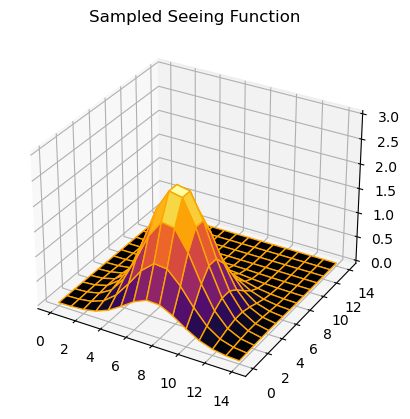

In [79]:
sigma_squared = (fwhm / 2)**2 / math.log(2)

def centered_seeing_function(x, y):
    distance_squared = x**2 + y**2
    return math.exp(-distance_squared / sigma_squared)

def make_seeing_function(h0, x0, y0):
    def seeing_function(x, y):
        return h0 * centered_seeing_function(x - x0, y - y0)

    return seeing_function

seeing_function = make_seeing_function(h0, x0, y0)

x_positions = range(box_size)
y_positions = range(box_size)

samples = [[seeing_function(i, j) for i in x_positions] for j in y_positions]

x = np.outer(x_positions, np.ones(box_size)).T
y = np.outer(y_positions, np.ones(box_size))
data = np.array(samples)
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='inferno', edgecolor='orange')
ax.set_title('Sampled Seeing Function')
ax.axes.set_zlim3d(bottom=0, top=3)

plt.show()

# The numpy convention when converting a nested list to an array is
# that the most-rapidly varying index stays last, which sort of makes sense.
#
# To be concrete, samples[int(y0)][int(x0)] will be near the peak:
#
# inty0 = int(y0)
# intx0 = int(x0)
#
# (samples[inty0][intx0], data[inty0, intx0], h0)
#
# The above few lines will reveal values that are nearly h0.

## Use scipy.optimize to &ldquo;Discover&rdquo; this &ldquo;Data&rdquo;

In [3]:
def variance(model, data):
    shape = data.shape
    sum = 0.0
    for j in range(shape[0]):
        for i in range(shape[1]):
            difference = model(i, j) - data[j, i]
            sum += difference**2
    return sum


In [4]:
POSITION_X_MODEL_PARAMETER = 0

def objective_function(model_parameters, data, spike_radius):
    spike_position_x = model_parameters[POSITION_X_MODEL_PARAMETER]
    spike_position_y = y0
    model = make_model(0, (spike_position_x, y0), fwhm, h0)
    return variance(model, data)


### Make our initial guesses

In [5]:
### Make our initial guesses

background0 = np.median(data)

# maximum = 0.0
# index_x = 0
# index_y = 0
# for j in y_positions:
#     for i in x_positions:
#         if data[j, i] > maximum:
#             maximum = data[j, i]
#             index_x = i
#             index_y = j

# spike_flux0 = maximum - background0
# spike_position_x0 = index_x
# spike_position_y0 = index_y
spike_flux0 = 1.0
spike_position_x0 = 4
spike_position_y0 = 4

x0 = (background0, spike_position_x0, spike_position_y0, spike_flux0)

In [6]:
from scipy.optimize import minimize

spike_radius = 1.0

result = minimize(objective_function, x0=x0, args=(data, spike_radius)).x

In [7]:
background = result[BACKGROUND_MODEL_PARAMETER]
spike_position_x = result[POSITION_X_MODEL_PARAMETER]
spike_position_y = result[POSITION_Y_MODEL_PARAMETER]
spike_flux = result[SPIKE_FLUX_MODEL_PARAMETER]

model = make_model(background, (spike_position_x, spike_position_y), spike_radius, spike_flux)
values = [[model(i, j) for i in x_positions] for j in y_positions]

### Plot the data and the fit

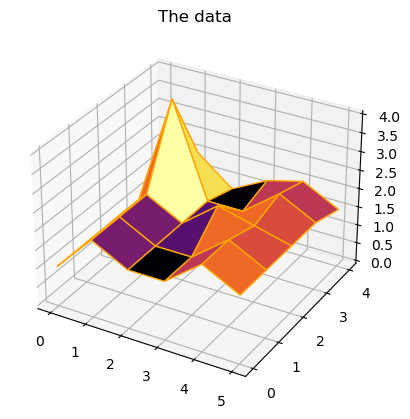

In [8]:
# importing libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
# defining surface and axes
x = np.outer(x_positions, np.ones(5)).T
y = np.outer(y_positions, np.ones(6))
z = np.array(data)
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='inferno', edgecolor='orange')
ax.set_title('The data')

ax.axes.set_zlim3d(bottom=0, top=4) 

plt.show()

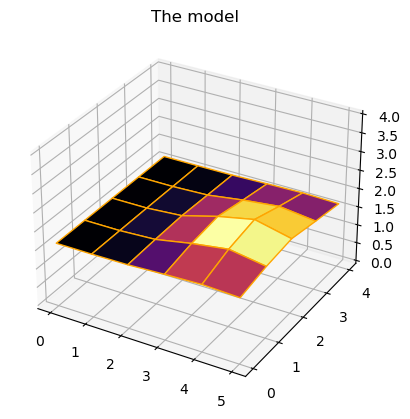

In [9]:
z = np.array(values)

fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='inferno', edgecolor='orange')
ax.set_title('The model')
ax.axes.set_zlim3d(bottom=0, top=4) 
plt.show()

In [10]:
(background, (spike_position_x, spike_position_y), spike_radius, spike_flux)

(1.6262867702581796,
 (3.963102386374188, 1.8621938326929375),
 1.0,
 3.4292089538232866)